In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris= load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
print(iris.feature_names,iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [7]:
iris.data.shape

(150, 4)

In [12]:
df= pd.DataFrame(iris.data, columns= iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
df['target']= iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
df['flower_name']= df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [17]:
setosa_df= df[df.target==0]
versicolor_df= df[df.target==1]
virginica_df= df[df.target==2]

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

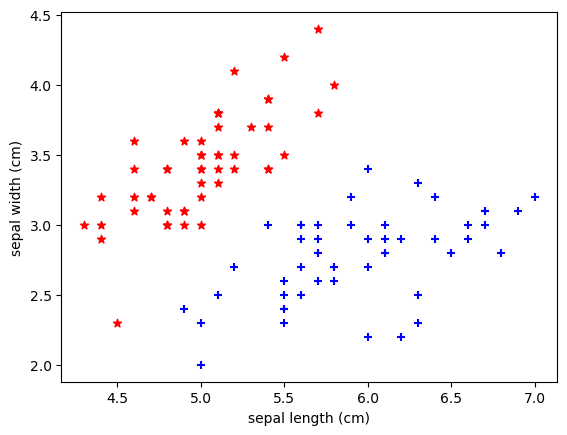

In [25]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(setosa_df['sepal length (cm)'],setosa_df['sepal width (cm)'], color= 'red', marker='*')
plt.scatter(versicolor_df['sepal length (cm)'],versicolor_df['sepal width (cm)'], color= 'blue', marker='+')

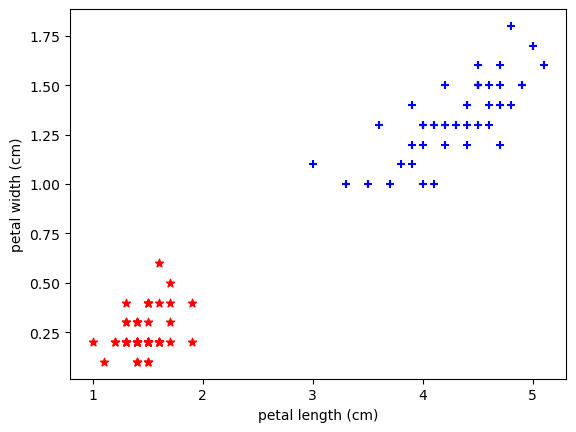

In [26]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(setosa_df['petal length (cm)'],setosa_df['petal width (cm)'], color= 'red', marker='*')
plt.scatter(versicolor_df['petal length (cm)'],versicolor_df['petal width (cm)'], color= 'blue', marker='+')

In [27]:
from sklearn.model_selection import train_test_split


In [30]:
X= df.drop(['target','flower_name'], axis='columns')
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
y= df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [33]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [34]:
from sklearn import svm

In [36]:
model= svm.SVC()
model.fit(X_train,y_train)

SVC()

In [37]:
model.predict(X_test)

array([2, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 0, 0,
       1, 2, 1, 1, 0, 1, 2, 2])

In [38]:
model.score(X_test,y_test)

0.9